In [4]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Upload both CSVs when prompted
fg_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [5]:
# Step 1: Install and import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For display
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [6]:
display(fg_df.head())
display(trader_df.head())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
# Basic info check
print("Trader Data:")
print(trader_df.info(), "\n")
print(trader_df.head(2), "\n")

print("Fear-Greed Data:")
print(fg_df.info(), "\n")
print(fg_df.head(2))

# Standardize column names (lowercase and underscores)
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(' ', '_')
fg_df.columns = fg_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Preview cleaned columns
print("\nCleaned trader_df columns:", trader_df.columns.tolist())
print("Cleaned fg_df columns:", fg_df.columns.tolist())


Trader Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64    

In [14]:
# Convert Fear-Greed date to datetime
fg_df['date'] = pd.to_datetime(fg_df['date']).dt.date

# Convert Trader timestamp to datetime and extract date
trader_df['timestamp_ist'] = pd.to_datetime(trader_df['timestamp_ist'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df['date'] = trader_df['timestamp_ist'].dt.date

# Merge on date (left join to retain all trades)
merged_df = pd.merge(trader_df, fg_df[['date', 'classification', 'value']], on='date', how='left')

print("Merged dataset shape:", merged_df.shape)
merged_df.head()


Merged dataset shape: (211224, 19)


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,2024-12-02,Extreme Greed,80.0


In [15]:
# Drop rows with no PnL or sentiment classification
merged_df = merged_df.dropna(subset=['closed_pnl', 'classification'])

# Convert numeric columns properly
merged_df['closed_pnl'] = pd.to_numeric(merged_df['closed_pnl'], errors='coerce')
merged_df['value'] = pd.to_numeric(merged_df['value'], errors='coerce')

# Confirm cleaning
print(merged_df[['classification','closed_pnl']].describe())


          closed_pnl
count  211218.000000
mean       48.549304
std       917.989791
min   -117990.104100
25%         0.000000
50%         0.000000
75%         5.790132
max    135329.090100


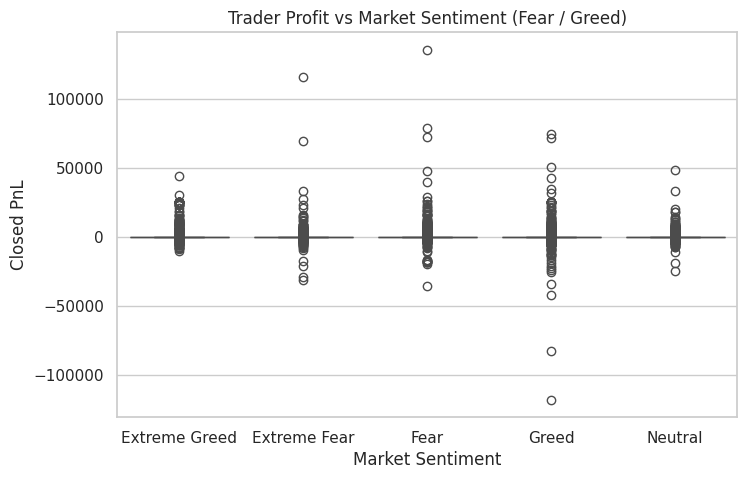

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='closed_pnl', data=merged_df)
plt.title("Trader Profit vs Market Sentiment (Fear / Greed)")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


In [17]:
# Average profit by sentiment
avg_pnl = merged_df.groupby('classification')['closed_pnl'].mean().sort_values(ascending=False)
print("Average Closed PnL by Sentiment:\n", avg_pnl, "\n")

# Count of trades under each sentiment
sentiment_counts = merged_df['classification'].value_counts()
print("Trade count by Sentiment:\n", sentiment_counts)


Average Closed PnL by Sentiment:
 classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: closed_pnl, dtype: float64 

Trade count by Sentiment:
 classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


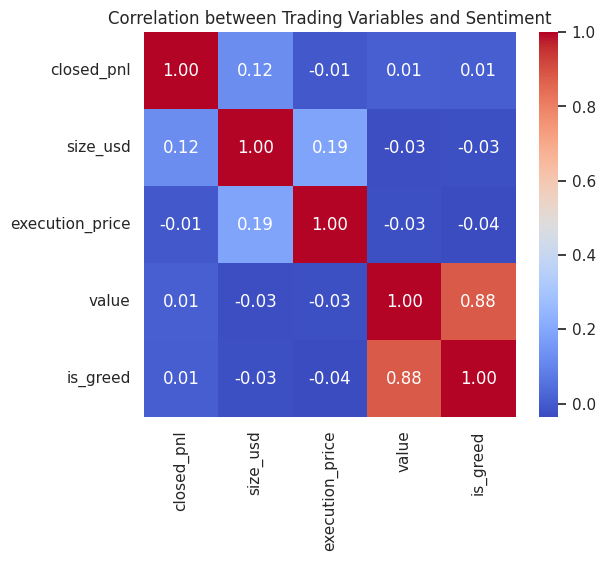

In [18]:
# Add sentiment as binary (1 = Greed / 0 = Fear or Extreme Fear)
merged_df['is_greed'] = merged_df['classification'].apply(lambda x: 1 if 'Greed' in str(x) else 0)

# Correlation heatmap
corr = merged_df[['closed_pnl', 'size_usd', 'execution_price', 'value', 'is_greed']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Trading Variables and Sentiment")
plt.show()


In [19]:
# Overall comparison
pnl_summary = merged_df.groupby('classification')['closed_pnl'].agg(['mean','median','std','count'])
pnl_summary['positive_trades_%'] = merged_df.groupby('classification')['closed_pnl'].apply(lambda x: (x > 0).mean()*100)

print("=== Trader Performance Summary by Market Sentiment ===\n")
print(pnl_summary.sort_values('mean', ascending=False))


=== Trader Performance Summary by Market Sentiment ===

                     mean  median          std  count  positive_trades_%
classification                                                          
Extreme Greed   67.892861     0.0   766.828294  39992          46.494299
Fear            54.290400     0.0   935.355438  61837          42.076750
Greed           42.743559     0.0  1116.028390  50303          38.482794
Extreme Fear    34.537862     0.0  1136.056091  21400          37.060748
Neutral         34.307718     0.0   517.122220  37686          39.699093


In [20]:
# Save cleaned + merged dataset for submission
merged_df.to_csv("Processed_Trader_Sentiment_Data.csv", index=False)

from google.colab import files
files.download("Processed_Trader_Sentiment_Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>